# BÀI 1: Geometric Transformations of Images

https://medium.com/hipster-color-science/computing-2d-affine-transformations-using-only-matrix-multiplication-2ccb31b52181

## Goals

- Learn to apply different geometric transformation to images like translation, rotation, affine transformation etc.
- You will see these functions: cv2.getPerspectiveTransform

## 1.1 Scaling

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
abs_path = []
rel_path = []
for _file in os.listdir('image'):
    abs_path.append(os.path.abspath(_file))
    rel_path.append(os.path.join('image', _file))

##### OpenCV comes with a function cv2.resize() for this purpose. 

Preferable interpolation methods are __cv2.INTER_AREA__ for shrinking and __cv2.INTER_CUBIC__ (slow) & __cv2.INTER_LINEAR__ for zooming. By default, interpolation method used is __cv2.INTER_LINEAR__ for all resizing purposes.

In [9]:
img = cv2.imread(rel_path[0])

res1 = cv2.resize(img,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)

#OR

height, width = img.shape[:2]
res2 = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)

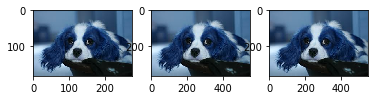

In [11]:
plt.subplot(1,3,1)
plt.imshow(img)
plt.subplot(1,3,2)
plt.imshow(res1)
plt.subplot(1,3,3)
plt.imshow(res2)

If you are <font color=red>__enlarging__</font> the image, you should prefer to use INTER_LINEAR or INTER_CUBIC interpolation. If you are  <font color=red>__shrinking__</font> the image, you should prefer to use INTER_AREA interpolation.

Cubic interpolation is computationally more complex, and hence slower than linear interpolation. However, the quality of the resulting image will be higher.

## 1.2 Translation

Translation is the shifting of object’s location. If you know the shift in (x,y) direction, let it be (t_x,t_y), you can create the transformation matrix \textbf{M} as follows:

<img src="translationMatrix.png">

['image/gradient.png', 'image/.DS_Store', 'image/adaptivethreshold_using.png', 'image/ada_thresholding.png', 'image/bilateral_result.jpg', 'image/blur.png', 'image/median.png', 'image/affine.png', 'image/result_adaptivethresholding.png', 'image/perspective.png', 'image/4.jpg', 'image/5.jpg', 'image/2.jpg', 'image/3.jpg', 'image/1.jpg', 'image/bilateral.png']


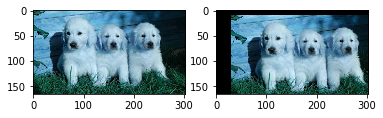

In [6]:
print(rel_path)
img = cv2.imread('image/3.jpg')
rows,cols = img[:,:,0].shape

M = np.float32([[1,0,30],[0,1,10]])
dst = cv2.warpAffine(img,M,(cols,rows))

plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(dst)

## 1.3 Rotation

<img src="rotation.png">

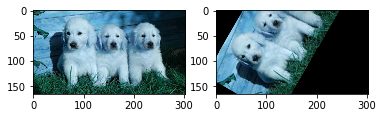

In [10]:
img = cv2.imread('image/3.jpg')
rows,cols = img[:,:,0].shape

#cv2.getRotationMatrix2D(center, angle, scale)

M = cv2.getRotationMatrix2D((cols/3,rows/2),60,1)
dst = cv2.warpAffine(img,M,(cols,rows))
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(dst)

## 1.4 Affine Transformation


- An affine transformation is any transformation that preserves __collinearity__ (i.e., all points lying on a line initially still lie on a line after transformation) and __ratios of distances__ (e.g., the midpoint of a line segment remains the midpoint after transformation). In this sense, affine indicates a special class of projective transformations that do not move any objects from the affine space R^3 to the plane at infinity or conversely. An affine transformation is also called an affinity.

- In affine transformation, all parallel lines in the original image will still be parallel in the output image. To find the transformation matrix, we need three points from input image and their corresponding locations in output image. Then __cv2.getAffineTransform__ will create a 2x3 matrix which is to be passed to __cv2.warpAffine__.

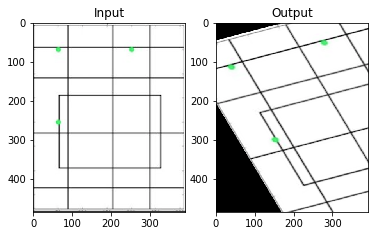

In [45]:
img = cv2.imread(rel_path[0])
rows,cols,ch = img.shape

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(img,M,(cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

## 1.5 Perspective Transformation

For perspective transformation, you need a 3x3 transformation matrix. Straight lines will remain straight even after the transformation. To find this transformation matrix, you need 4 points on the input image and corresponding points on the output image. Among these 4 points, 3 of them should not be collinear. Then transformation matrix can be found by the function __cv2.getPerspectiveTransform__. Then apply __cv2.warpPerspective__ with this 3x3 transformation matrix.

['image/.DS_Store', 'image/affine.png', 'image/perspective.png', 'image/4.jpg', 'image/5.jpg', 'image/2.jpg', 'image/3.jpg', 'image/1.jpg']


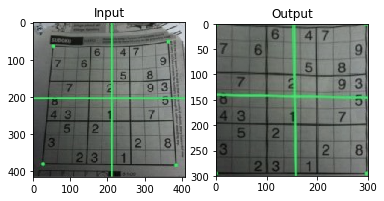

In [52]:
print(rel_path)

img = cv2.imread(rel_path[2])
rows,cols,ch = img.shape

pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(300,300))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

# Bài 2: Image Thresholding

## 2.1 Simple Thresholding

Here, the matter is straight forward. If pixel value is __greater than a threshold value__, it is assigned __one value (may be white)__, else it is assigned __another value (may be black)__. The function used is cv2.threshold. First argument is the source image, which should be a __grayscale image__. Second argument is the threshold value which is used to classify the pixel values. Third argument is the maxVal which represents the value to be given if pixel value is more than (sometimes less than) the threshold value. OpenCV provides different styles of thresholding and it is decided by the fourth parameter of the function. Different types are:

- cv2.THRESH_BINARY
- cv2.THRESH_BINARY_INV
- cv2.THRESH_TRUNC
- cv2.THRESH_TOZERO
- cv2.THRESH_TOZERO_INV

['image/gradient.png', 'image/.DS_Store', 'image/affine.png', 'image/perspective.png', 'image/4.jpg', 'image/5.jpg', 'image/2.jpg', 'image/3.jpg', 'image/1.jpg']


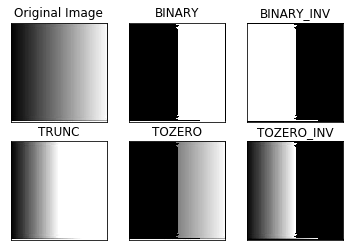

In [64]:
print(rel_path)

img = cv2.imread(rel_path[0],0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

## 2.2 Adaptive Thresholding

In the previous section, we used a global value as threshold value. But it may not be good in all the conditions where image has different lighting conditions in different areas. In that case, we go for adaptive thresholding. In this, the algorithm calculate the threshold for a small regions of the image. So we get different thresholds for different regions of the same image and it gives us better results for images with varying illumination.

It has three ‘special’ input params and only one output argument.

__Adaptive Method - It decides how thresholding value is calculated.__
- cv2.ADAPTIVE_THRESH_MEAN_C : threshold value is the mean of neighbourhood area.
- cv2.ADAPTIVE_THRESH_GAUSSIAN_C : threshold value is the weighted sum of neighbourhood values where weights are a gaussian window.

__Block Size__ - It decides the size of neighbourhood area.

__C__ - It is just a constant which is subtracted from the mean or weighted mean calculated.

<img src="image/adaptivethreshold_using.png">

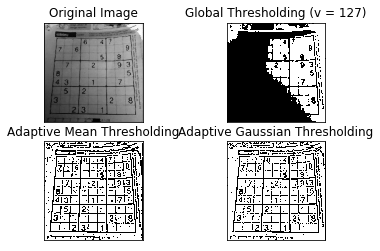

In [95]:
img = cv2.imread('image/ada_thresholding.png',0)
img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

<img src="image/result_adaptivethresholding.png">

## 2.3 Otsu’s Binarization (pending)

# Bài 3: Smoothing Images

## 2D Convolution ( Image Filtering)
#### As for one-dimensional signals, images also can be filtered with various low-pass filters (LPF), high-pass filters (HPF), etc. A LPF helps in removing noise, or blurring the image. A HPF filters helps in finding edges in an image.

http://www.songho.ca/dsp/convolution/convolution2d_example.html

http://setosa.io/ev/image-kernels/

https://cs231n.github.io/assets/conv-demo/index.html

## Image Blurring (Image Smoothing)

## 3.1. Averaging

This is done by convolving the image with a normalized box filter. It simply takes the average of all the pixels under kernel area and replaces the central element with this average. This is done by the function __cv2.blur()__ or __cv2.boxFilter()__. Check the docs for more details about the kernel. We should specify the width and height of kernel. A 3x3 normalized box filter would look like this:

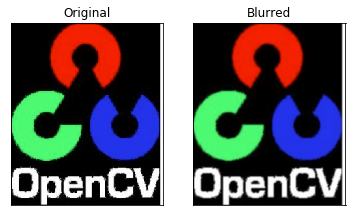

In [85]:
img = cv2.imread('image/blur.png')

blur = cv2.blur(img,(5,5))

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

## 3.2 Gaussian Filtering

In this approach, instead of a box filter consisting of equal filter coefficients, a Gaussian kernel is used. It is done with the function, __cv2.GaussianBlur()__. We should specify the width and height of the kernel which should be positive and odd. We also should specify the standard deviation in the X and Y directions, sigmaX and sigmaY respectively. If only sigmaX is specified, sigmaY is taken as equal to sigmaX. If both are given as zeros, they are calculated from the kernel size. Gaussian filtering is highly effective in removing Gaussian noise from the image.

In [89]:
# blur = cv2.GaussianBlur(img,(5,5),0)

## 3.3 Median Filtering

Here, the function __cv2.medianBlur()__ computes the median of all the pixels under the kernel window and the central pixel is replaced with this median value. This is highly effective in removing salt-and-pepper noise. One interesting thing to note is that, in the Gaussian and box filters, the filtered value for the central element can be a value which may not exist in the original image. However this is not the case in median filtering, since the central element is always replaced by some pixel value in the image. This reduces the noise effectively. The kernel size must be a positive odd integer.

In [91]:
# median = cv2.medianBlur(img,5)

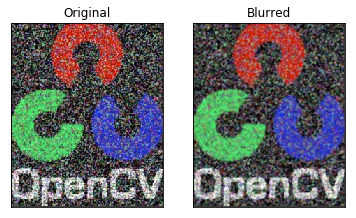

In [13]:
img = cv2.imread('image/median.png')
median = cv2.medianBlur(img,5)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(median),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

## 3.4 Bilateral Filtering

As we noted, the filters we presented earlier tend to blur edges. This is not the case for the bilateral filter, cv2.bilateralFilter(), __which was defined for, and is highly effective at noise removal while preserving edges. But the operation is slower compared to other filters__. We already saw that a Gaussian filter takes the a neighborhood around the pixel and finds its Gaussian weighted average. This Gaussian filter is a function of space alone, that is, nearby pixels are considered while filtering. It does not consider whether pixels have almost the same intensity value and does not consider whether the pixel lies on an edge or not. The resulting effect is that Gaussian filters tend to blur edges, which is undesirable.

The bilateral filter also uses a Gaussian filter in the space domain, but it also uses one more (multiplicative) Gaussian filter component which is a function of pixel intensity differences. The Gaussian function of space makes sure that only pixels are ‘spatial neighbors’ are considered for filtering, while the Gaussian component applied in the intensity domain (a Gaussian function of intensity differences) ensures that only those pixels with intensities similar to that of the central pixel (‘intensity neighbors’) are included to compute the blurred intensity value. As a result, this method preserves edges, since for pixels lying near edges, neighboring pixels placed on the other side of the edge, and therefore exhibiting large intensity variations when compared to the central pixel, will not be included for blurring.

The sample below demonstrates the use of bilateral filtering (For details on arguments, see the OpenCV docs).

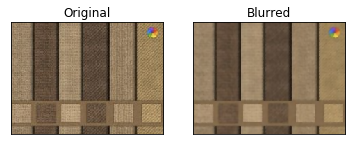

In [17]:
img = cv2.imread('image/bilateral.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
blur = cv2.bilateralFilter(img,9,75,75)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

# Bài 4 : Image Gradient

#### OpenCV provides three types of gradient filters or High-pass filters, Sobel, Scharr and Laplacian.
#### An image gradient is a directional change in the intensity or color in an image.

## 4.1 Sobel and Scharr Derivatives

Sobel operators is a joint Gausssian smoothing plus differentiation operation, so it is more resistant to noise. You can specify the direction of derivatives to be taken, vertical or horizontal (by the arguments, yorder and xorder respectively). You can also specify the size of kernel by the argument ksize. If ksize = -1, a 3x3 Scharr filter is used which gives better results than 3x3 Sobel filter. Please see the docs for kernels used.

<img src ="Sobel Operator.png">

## 4.2 Laplacian Derivatives

Laplacian Operator is also a derivative operator which is used to find edges in an image. The major difference between Laplacian and other operators like Prewitt, Sobel, Robinson and Kirsch is that these all are first order derivative masks but Laplacian is a second order derivative mask. In this mask we have two further classifications one is Positive Laplacian Operator and other is Negative Laplacian Operator.

[[ -8.   9.   4. ...  -2.  -2.  -2.]
 [-11.   8.  -4. ...   2.   2.   2.]
 [ -6.  -1.   3. ...   2.   1.   1.]
 ...
 [  4.   1.   5. ...   5.   1.  -8.]
 [ -3.  -1.   0. ...  -1.  -5.  -1.]
 [ -6.  -6.   1. ...  -1.   3.   8.]]


Text(0.5, 1.0, 'Original')

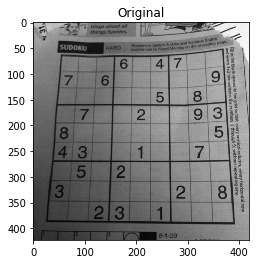

In [140]:
img = cv2.imread('sudoku.jpg',0)

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

print(laplacian)

plt.imshow(img,cmap = 'gray')
plt.title('Original')

Text(0.5, 1.0, 'Laplacian')

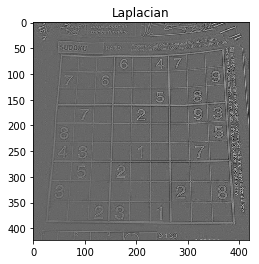

In [137]:
plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian')

Text(0.5, 1.0, 'Sobel X')

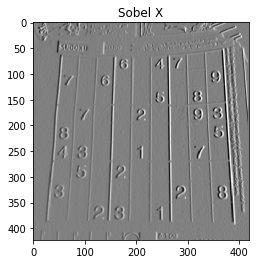

In [138]:
plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X')

Text(0.5, 1.0, 'Sobel Y')

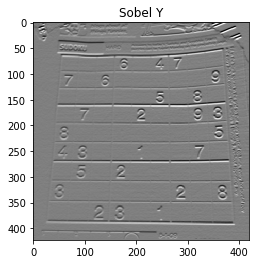

In [139]:
plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y')

## REMINDER

<img src="reminder.png">

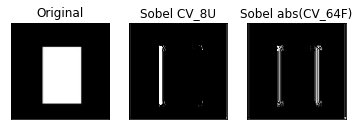

In [123]:
img = cv2.imread('box.png',0)

# Output dtype = cv2.CV_8U
sobelx8u = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)

# Output dtype = cv2.CV_64F. Then take its absolute and convert to cv2.CV_8U
sobelx64f = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)

plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx8u,cmap = 'gray')
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobel_8u,cmap = 'gray')
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])

plt.show()